In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Pre Processing

In [28]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,2,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,2,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,2,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [0]:
df['Item_Fat_Content'].unique()
df['Item_Fat_Content']=df['Item_Fat_Content'].map({'Low Fat':2,'low fat':2,'LF':2,'reg':1 , 'Regular':1})

In [49]:
print(df['Outlet_Identifier'].unique())
print(df['Item_Type'].unique())
print(df['Outlet_Size'].unique())
print(df['Outlet_Location_Type'].unique())
print(df['Outlet_Type'].unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' 'None' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [0]:
df = df.drop('Item_Identifier',axis=1)

In [0]:
numeric_variables = list(df.select_dtypes(include=['int64','float']).columns.values)
df[numeric_variables]=df[numeric_variables].apply(lambda x: x.fillna(x.mean()),axis=0)


In [27]:
numeric_variables

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [55]:
categorical_variables = list(df.select_dtypes(exclude=['int64','float','bool']).columns.values)
categorical_variables

['Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [0]:
df['Outlet_Size'] = df['Outlet_Size'].replace( np.nan,'None')

In [48]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,2,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,2,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,None,Tier 3,Grocery Store,732.3800
4,8.93,2,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


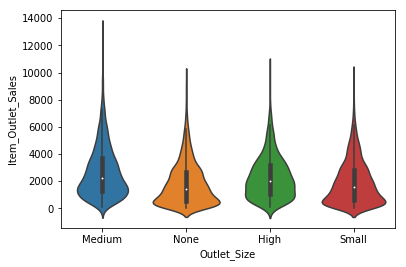

In [52]:
import seaborn as sns
sns.violinplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)

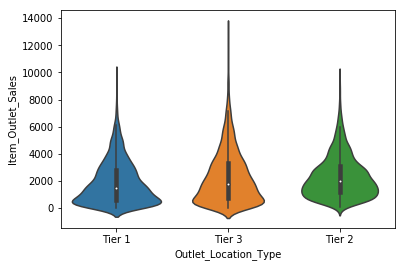

In [53]:
import seaborn as sns
sns.violinplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)

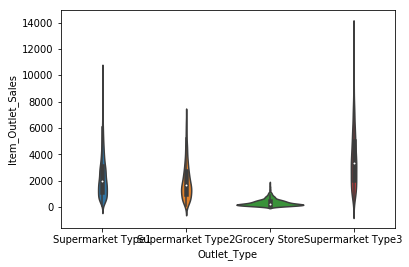

In [54]:
import seaborn as sns
sns.violinplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)

In [0]:
df = pd.get_dummies(df, prefix_sep="__",columns=categorical_variables) 

In [57]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type__Baking Goods,Item_Type__Breads,Item_Type__Breakfast,Item_Type__Canned,...,Outlet_Size__Medium,Outlet_Size__None,Outlet_Size__Small,Outlet_Location_Type__Tier 1,Outlet_Location_Type__Tier 2,Outlet_Location_Type__Tier 3,Outlet_Type__Grocery Store,Outlet_Type__Supermarket Type1,Outlet_Type__Supermarket Type2,Outlet_Type__Supermarket Type3
0,9.30,2,0.016047,249.8092,1999,3735.1380,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,2009,443.4228,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.50,2,0.016760,141.6180,1999,2097.2700,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1998,732.3800,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,2,0.000000,53.8614,1987,994.7052,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [0]:
y = df.Item_Outlet_Sales
X = df.drop('Item_Outlet_Sales',axis =1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [62]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [65]:
rms

1102.3844418038893

In [0]:
dft = pd.read_csv('Test.csv')

In [0]:
def clean(df):
  print(df['Item_Fat_Content'].unique())
  df['Item_Fat_Content']=df['Item_Fat_Content'].map({'Low Fat':2,'low fat':2,'LF':2,'reg':1 , 'Regular':1,np.nan:0})
  df = df.drop('Item_Identifier',axis=1)
  numeric_variables = list(df.select_dtypes(include=['int64','float']).columns.values)
  df[numeric_variables]=df[numeric_variables].apply(lambda x: x.fillna(x.mean()),axis=0)
  categorical_variables = list(df.select_dtypes(exclude=['int64','float','bool']).columns.values)
  df['Outlet_Size'] = df['Outlet_Size'].replace( np.nan,'None')
  df = pd.get_dummies(df, prefix_sep="__",columns=categorical_variables) 
  return df

In [0]:
def types(df):
  print(df['Outlet_Identifier'].unique())
  print(df['Item_Type'].unique())
  print(df['Outlet_Size'].unique())
  print(df['Outlet_Location_Type'].unique())
  print(df['Outlet_Type'].unique())

In [98]:
dfy = clean(dft)


[nan]


In [99]:
dfy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type__Baking Goods,Item_Type__Breads,Item_Type__Breakfast,Item_Type__Canned,Item_Type__Dairy,...,Outlet_Size__Medium,Outlet_Size__None,Outlet_Size__Small,Outlet_Location_Type__Tier 1,Outlet_Location_Type__Tier 2,Outlet_Location_Type__Tier 3,Outlet_Type__Grocery Store,Outlet_Type__Supermarket Type1,Outlet_Type__Supermarket Type2,Outlet_Type__Supermarket Type3
0,20.750000,0,0.007565,107.8622,1999,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,8.300000,0,0.038428,87.3198,2007,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0,0.099575,241.7538,1998,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315000,0,0.015388,155.0340,2007,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.695633,0,0.118599,234.2300,1985,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [95]:
X.shape

(8523, 42)

In [96]:
dfy.shape

(5681, 42)

In [0]:
y_pred = reg.predict(dfy)

In [0]:
sam = pd.read_csv('SampleSubmission.csv')

In [0]:
sam['Item_Outlet_Sales']=y_pred

In [108]:
sam.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1990.742117
1,FDW14,OUT017,1566.233749
2,NCN55,OUT010,2063.924595
3,FDQ58,OUT017,2754.371216
4,FDY38,OUT027,5157.694860


In [0]:
sam.to_csv('soln.csv')